## Week One: Exploratory Data Analysis
## Estée Lauder Customer Revenue Analysis
#
## **Authors:** Selena Ho, Sahiti Srikakolapu, Rosina Zhou, Neveah Clark,
##              Angela Wang, Abubakar Diallo, Kaylee Scanlin

In [ ]:
# =============================================================================
# 1. SETUP AND DATA LOADING
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm

In [ ]:
# Load dataset
df = pd.read_parquet("https://drive.google.com/uc?export=download&id=1W7KckqLdLLQCut0o1I-8mDYK60zSZY_J")

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Shape: (20000, 7)

First few rows:
                            customer_id            name  aov (t-1)  \
0  b36ac04d-8855-4a1f-9c5f-d82006747e38  Makayla Miller     107.32   
1  c1bdefa8-dd48-4b27-be7e-18234975d9fc    Joshua Haley     183.86   
2  a006499f-89d6-4220-9cec-8b1655a6a76f  Jennifer Moore     109.28   
3  05e2d4f8-16b1-481f-8460-8ae8e112e23b    Misty Zamora     101.43   
4  6870cf65-b5ae-4f84-92ef-61004c68e0a8   Noah Williams     232.89   

   days_since_last_purchase (t-1)  tenure_in_days(t-1)  loyalty_membership  \
0                              16                   13                   0   
1                              26                  275                   0   
2                              12                   75                   0   
3                              29                    5                   0   
4                               4                   23                   0   

   revenue (t)  
0       118.06  
1       129.

In [ ]:
# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "="*60)
print("DATA QUALITY ASSESSMENT")
print("="*60)

# Basic info
print(f"\nDataset dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Unique customers: {df['customer_id'].nunique():,}")

# Missing values check
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_pct
})
print("\nMissing Values:")
print(missing_data[missing_data['Missing Values'] > 0])
if missing_data['Missing Values'].sum() == 0:
    print("✓ No missing values detected")

# Check for negative values
numeric_cols = df.select_dtypes(include=[np.number]).columns
has_negatives = (df[numeric_cols] < 0).any()
print(f"\n✓ No negative values in dataset" if not has_negatives.any() else "⚠ Negative values found")


DATA QUALITY ASSESSMENT

Dataset dimensions: 20,000 rows × 7 columns
Unique customers: 20,000

Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []
✓ No missing values detected

✓ No negative values in dataset


In [ ]:
# =============================================================================
# 3. DESCRIPTIVE STATISTICS
# =============================================================================

print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

desc_stats = df.describe()
print("\n", desc_stats)

print(f"\nMost variable feature: {desc_stats.loc['std'].idxmax()}")
print(f"Standard deviation: {desc_stats.loc['std'].max():.2f}")

# Loyalty membership distribution
loyalty_dist = df['loyalty_membership'].value_counts()
print(f"\nLoyalty Membership Distribution:")
print(f"Non-members: {loyalty_dist[0]:,} ({loyalty_dist[0]/len(df)*100:.1f}%)")
print(f"Members: {loyalty_dist[1]:,} ({loyalty_dist[1]/len(df)*100:.1f}%)")


DESCRIPTIVE STATISTICS

           aov (t-1)  days_since_last_purchase (t-1)  tenure_in_days(t-1)  \
count  20000.000000                    20000.000000         20000.000000   
mean      97.567207                       14.558400            49.583900   
std       40.914830                       15.257196            66.912765   
min       20.230000                        0.000000             1.000000   
25%       68.660000                        4.000000            15.000000   
50%       89.965000                       10.000000            30.000000   
75%      117.622500                       20.000000            58.000000   
max      436.540000                      152.000000          1564.000000   

       loyalty_membership   revenue (t)  
count         20000.00000  20000.000000  
mean              0.06035    117.223844  
std               0.23814     23.988526  
min               0.00000     43.500000  
25%               0.00000    102.327500  
50%               0.00000    115.0600


UNIVARIATE DISTRIBUTIONS


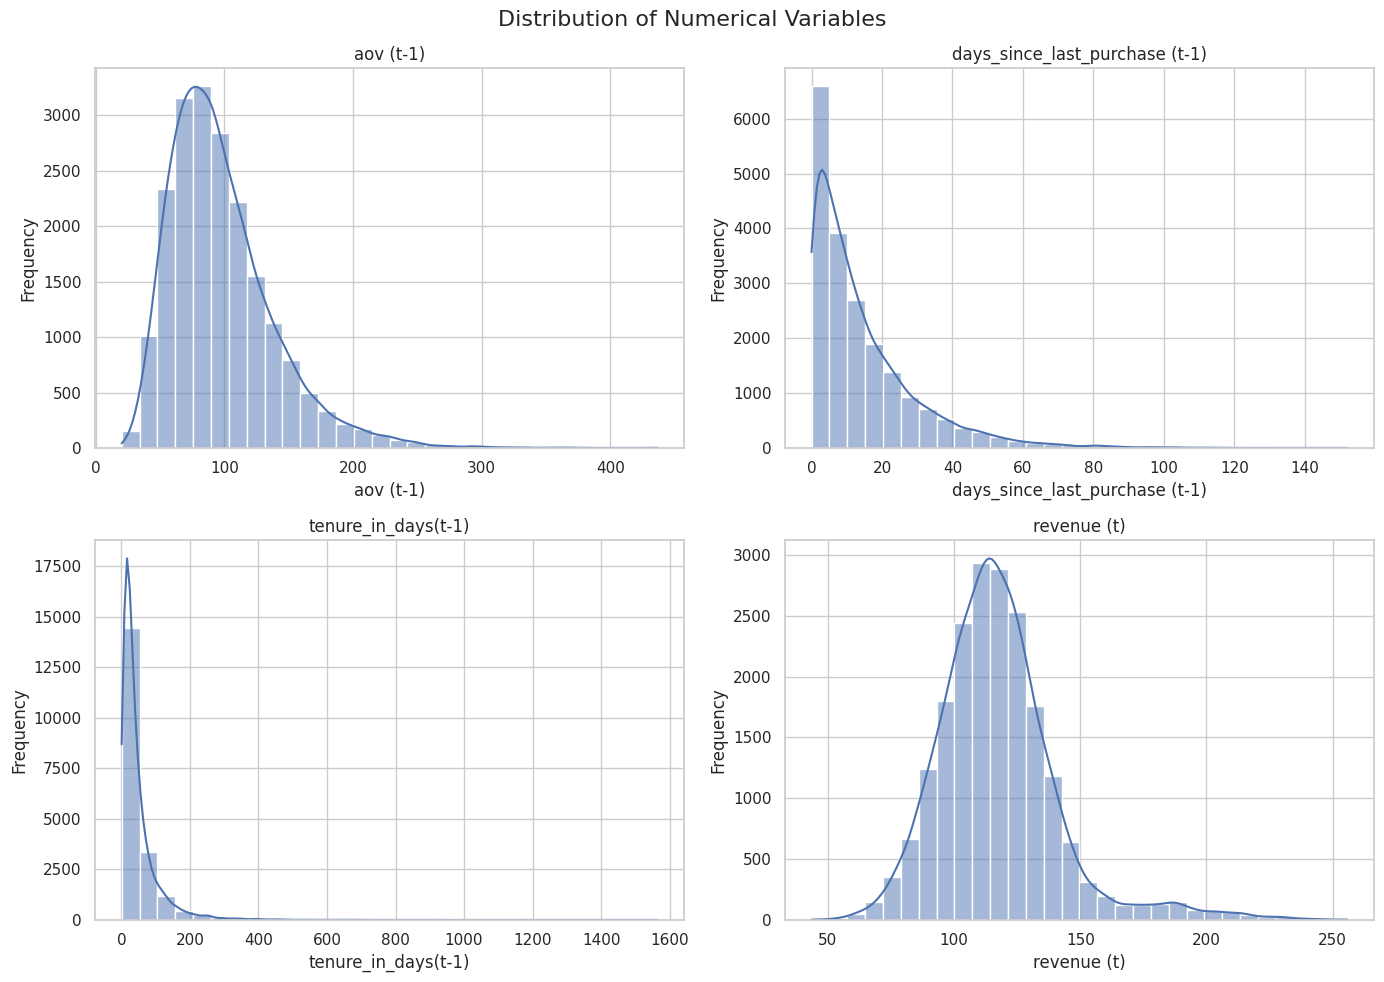

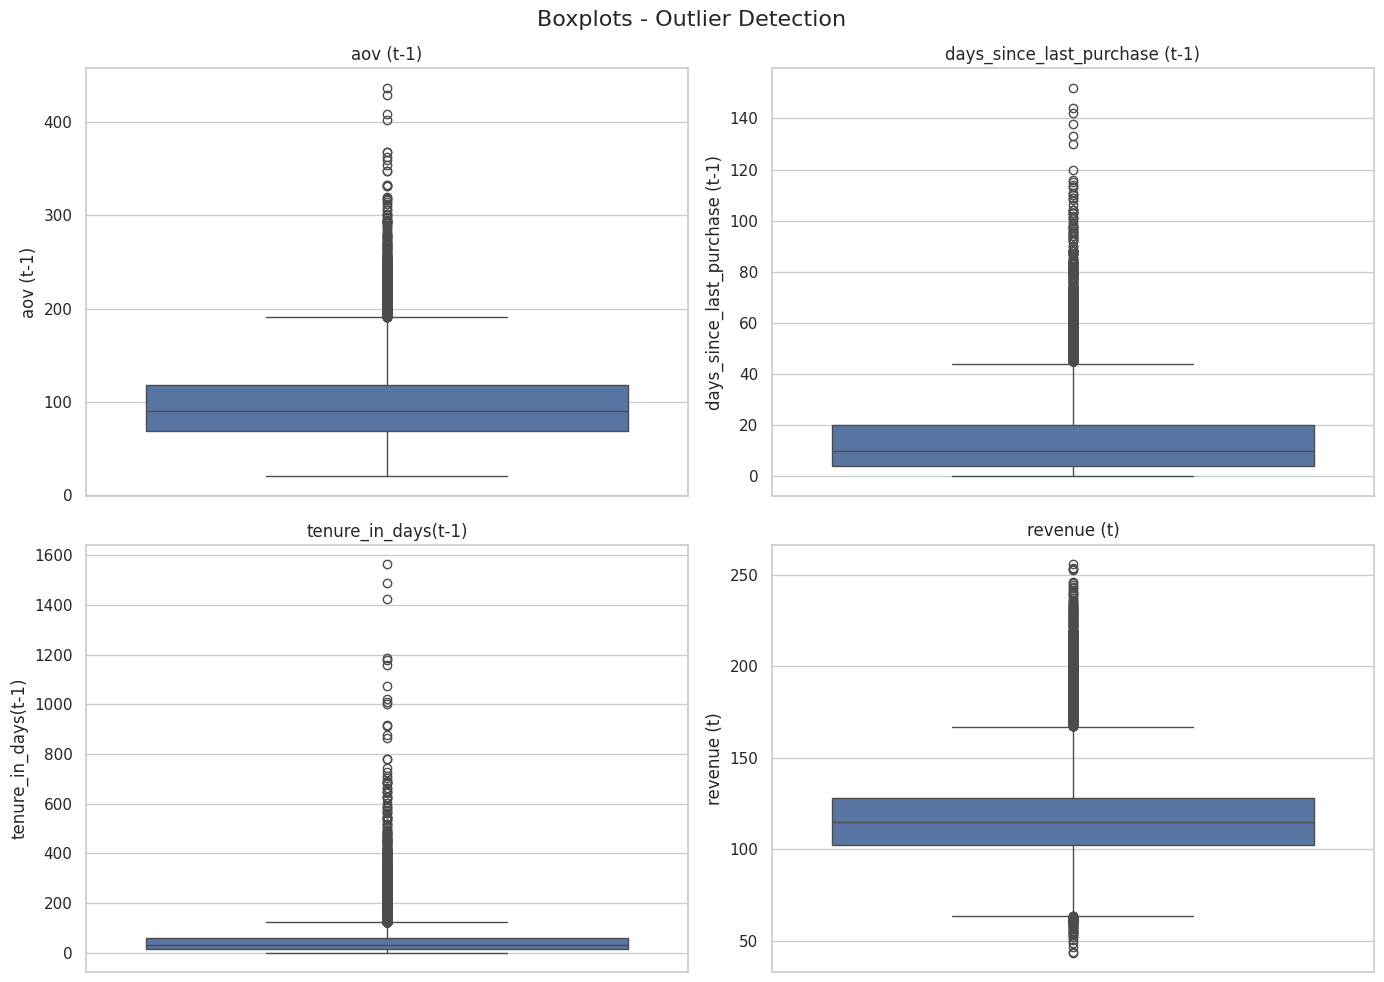

In [ ]:
# =============================================================================
# 4. UNIVARIATE ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("UNIVARIATE DISTRIBUTIONS")
print("="*60)

# Set style for all plots
sns.set(style="whitegrid")

# Histograms for all numeric features
numeric_cols = ['aov (t-1)', 'days_since_last_purchase (t-1)',
                'tenure_in_days(t-1)', 'revenue (t)']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for idx, col in enumerate(numeric_cols):
    ax = axes[idx//2, idx%2]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots - Outlier Detection', fontsize=16)

for idx, col in enumerate(numeric_cols):
    ax = axes[idx//2, idx%2]
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()


LOYALTY MEMBERSHIP IMPACT ANALYSIS

Revenue by Loyalty Status:
                          mean  median        std
loyalty_membership                               
0                   113.354800  113.71  17.851533
1                   177.464888  177.92  26.677934


/tmp/ipython-input-4074103844.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Member', 'Member'])
/tmp/ipython-input-4074103844.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Member', 'Member'])
/tmp/ipython-input-4074103844.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Member', 'Member'])
/tmp/ipython-input-4074103844.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Member', 'Member'])


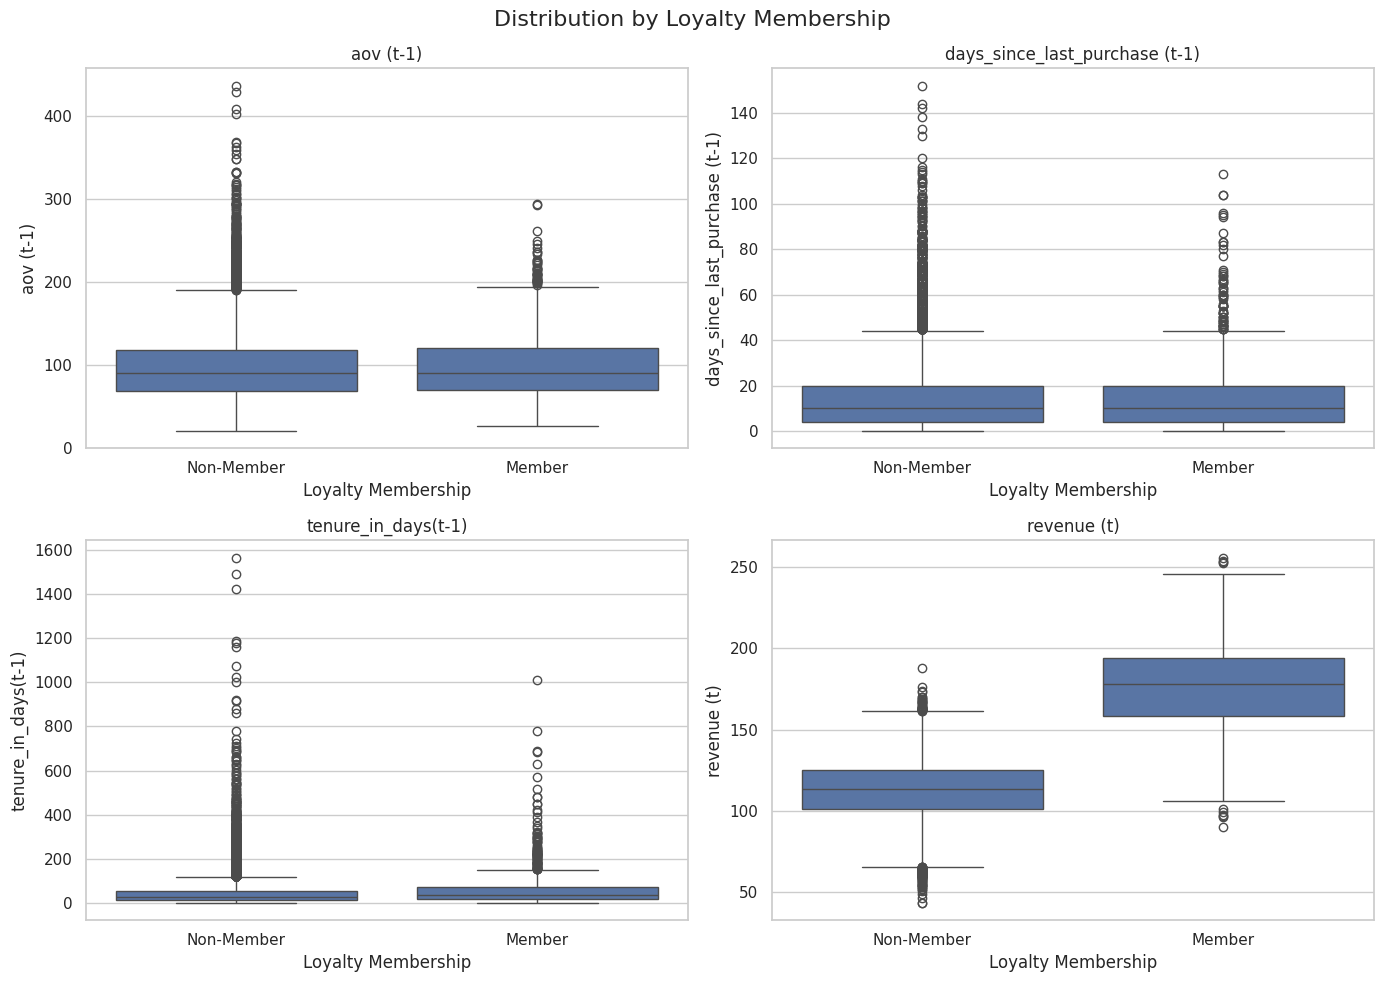


Key Findings:
• AOV: Similar between groups (outliers in non-members reach $400+)
• Revenue: Loyalty members generate $177.46 avg vs $113.35
• Recency: Similar patterns, non-members have more outliers


In [ ]:
# =============================================================================
# 5. BIVARIATE ANALYSIS - LOYALTY IMPACT
# =============================================================================

print("\n" + "="*60)
print("LOYALTY MEMBERSHIP IMPACT ANALYSIS")
print("="*60)

# Summary statistics by loyalty status
loyalty_summary = df.groupby('loyalty_membership')[numeric_cols].agg(['mean', 'median', 'std'])
print("\nRevenue by Loyalty Status:")
print(loyalty_summary['revenue (t)'])

# Boxplots comparing loyalty vs non-loyalty
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution by Loyalty Membership', fontsize=16)

for idx, col in enumerate(numeric_cols):
    ax = axes[idx//2, idx%2]
    sns.boxplot(data=df, x='loyalty_membership', y=col, ax=ax)
    ax.set_xticklabels(['Non-Member', 'Member'])
    ax.set_xlabel('Loyalty Membership')
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()

# Key findings
print("\nKey Findings:")
print(f"• AOV: Similar between groups (outliers in non-members reach $400+)")
print(f"• Revenue: Loyalty members generate ${loyalty_summary['revenue (t)']['mean'][1]:.2f} avg vs ${loyalty_summary['revenue (t)']['mean'][0]:.2f}")
print(f"• Recency: Similar patterns, non-members have more outliers")


CORRELATION ANALYSIS - COMPARING METHODS

Pearson Correlation Matrix (Linear Relationships):
                                aov (t-1)  days_since_last_purchase (t-1)  \
aov (t-1)                           1.000                          -0.008   
days_since_last_purchase (t-1)     -0.008                           1.000   
tenure_in_days(t-1)                 0.005                          -0.007   
revenue (t)                         0.304                           0.382   

                                tenure_in_days(t-1)  revenue (t)  
aov (t-1)                                     0.005        0.304  
days_since_last_purchase (t-1)               -0.007        0.382  
tenure_in_days(t-1)                           1.000        0.088  
revenue (t)                                   0.088        1.000  

Spearman Correlation Matrix (Monotonic Relationships):
                                aov (t-1)  days_since_last_purchase (t-1)  \
aov (t-1)                           1.000           

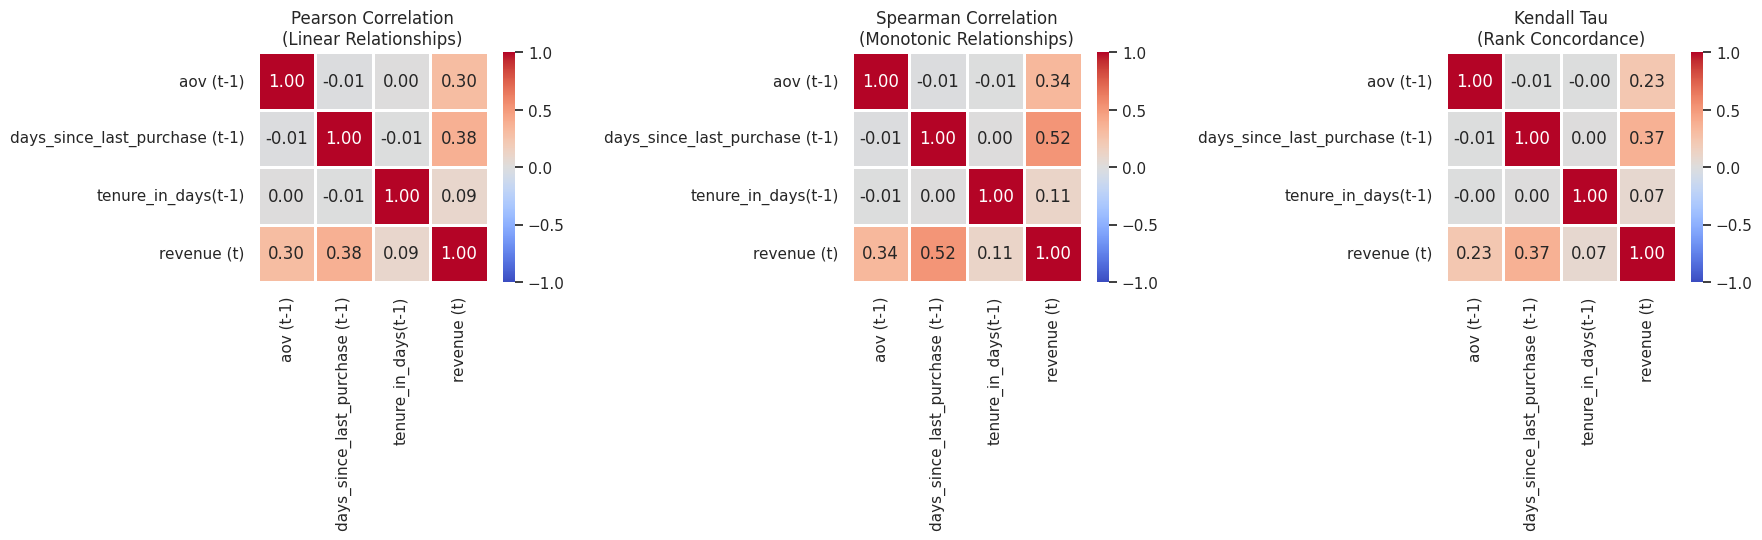


------------------------------------------------------------
CORRELATION METHOD COMPARISON ANALYSIS
------------------------------------------------------------

Largest Discrepancies (Pearson vs Spearman):
  days_since_last_purchase (t-1) vs revenue (t):
    Pearson:   0.382
    Spearman:  0.519
    Difference:  0.138

------------------------------------------------------------
KEY INSIGHTS:
------------------------------------------------------------

Average Absolute Correlation Strength:
  Pearson:  0.132
  Spearman: 0.164
  Kendall:  0.114

INTERPRETATION:
  • Spearman correlations are notably stronger than Pearson
  • This indicates NON-LINEAR but MONOTONIC relationships
  • Variables increase/decrease together, but not at constant rates
  • Recommendation: Use Spearman for this dataset

KEY RELATIONSHIP ANALYSIS:

aov (t-1) ↔ revenue (t):
  Pearson:   0.304
  Spearman:  0.336
  → Minimal difference (0.031): Relationship is approximately linear

tenure_in_days(t-1) ↔ revenue (t

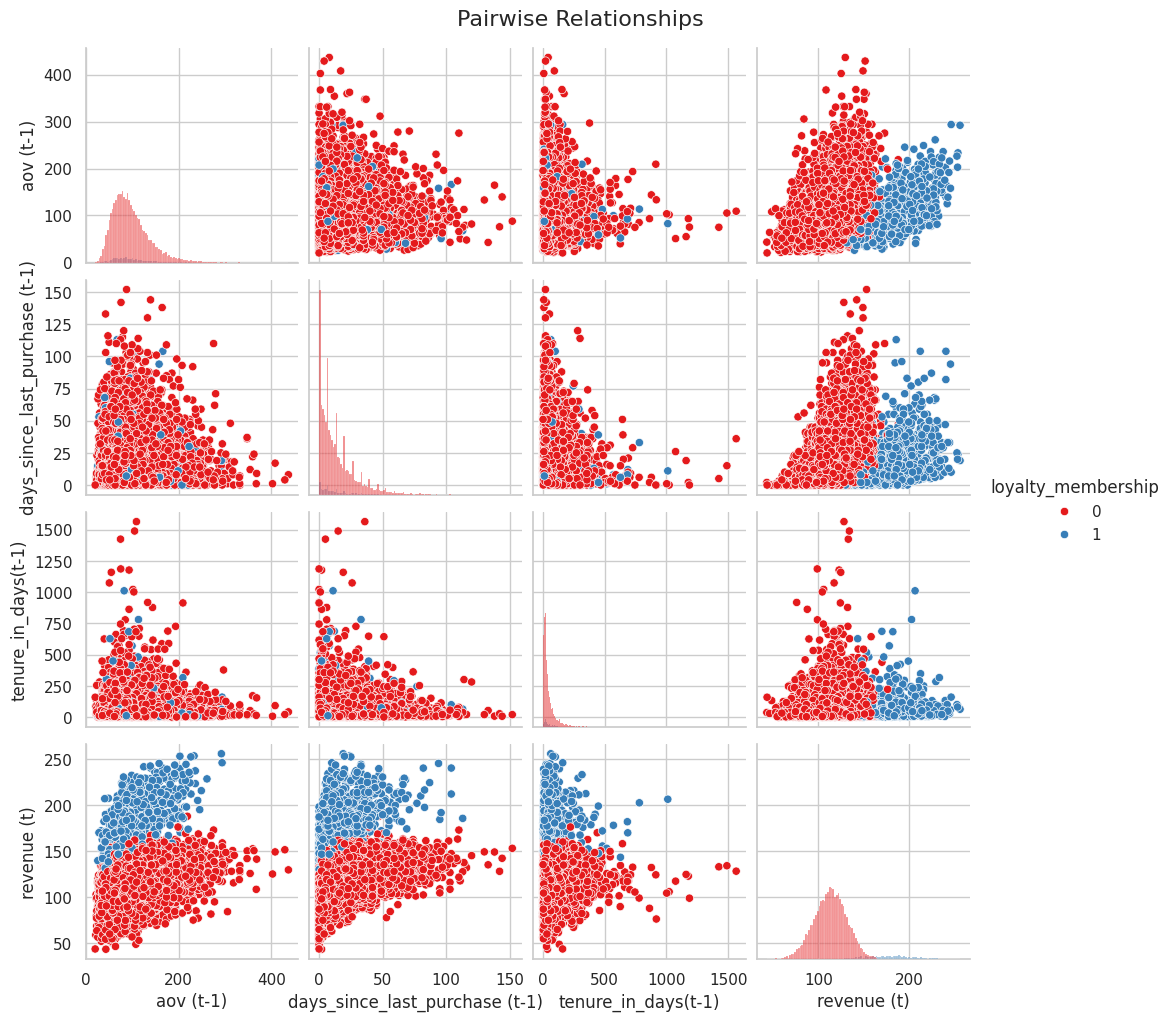

In [ ]:
# =============================================================================
# 6. CORRELATION ANALYSIS - COMPARING METHODS
# =============================================================================

print("\n" + "="*60)
print("CORRELATION ANALYSIS - COMPARING METHODS")
print("="*60)

# Calculate correlations using three different methods
pearson_corr = df[numeric_cols].corr(method='pearson')
spearman_corr = df[numeric_cols].corr(method='spearman')
kendall_corr = df[numeric_cols].corr(method='kendall')

print("\nPearson Correlation Matrix (Linear Relationships):")
print(pearson_corr.round(3))
print("\nSpearman Correlation Matrix (Monotonic Relationships):")
print(spearman_corr.round(3))
print("\nKendall Correlation Matrix (Rank-based):")
print(kendall_corr.round(3))

# Visual comparison of all three methods
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', ax=axes[0], vmin=-1, vmax=1, square=True, linewidths=1)
axes[0].set_title("Pearson Correlation\n(Linear Relationships)", fontsize=12)

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', ax=axes[1], vmin=-1, vmax=1, square=True, linewidths=1)
axes[1].set_title("Spearman Correlation\n(Monotonic Relationships)", fontsize=12)

sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', ax=axes[2], vmin=-1, vmax=1, square=True, linewidths=1)
axes[2].set_title("Kendall Tau\n(Rank Concordance)", fontsize=12)

plt.tight_layout()
plt.show()

# Analyze differences between methods
print("\n" + "-"*60)
print("CORRELATION METHOD COMPARISON ANALYSIS")
print("-"*60)

# Calculate absolute differences between methods
diff_pearson_spearman = np.abs(pearson_corr - spearman_corr)
diff_pearson_kendall = np.abs(pearson_corr - kendall_corr)

# Find pairs with largest differences
print("\nLargest Discrepancies (Pearson vs Spearman):")
mask = np.triu(np.ones_like(diff_pearson_spearman, dtype=bool), k=1)
diff_ps_masked = diff_pearson_spearman.where(mask)
diff_ps_stacked = diff_ps_masked.stack().sort_values(ascending=False)

for (var1, var2), diff in diff_ps_stacked.head(3).items():
    if diff > 0.05:  # Only show meaningful differences
        pearson_val = pearson_corr.loc[var1, var2]
        spearman_val = spearman_corr.loc[var1, var2]
        print(f"  {var1} vs {var2}:")
        print(f"    Pearson:  {pearson_val:6.3f}")
        print(f"    Spearman: {spearman_val:6.3f}")
        print(f"    Difference: {diff:6.3f}")

print("\n" + "-"*60)
print("KEY INSIGHTS:")
print("-"*60)

# Compare average absolute correlation strengths
avg_pearson = np.abs(pearson_corr.values[np.triu_indices_from(pearson_corr.values, k=1)]).mean()
avg_spearman = np.abs(spearman_corr.values[np.triu_indices_from(spearman_corr.values, k=1)]).mean()
avg_kendall = np.abs(kendall_corr.values[np.triu_indices_from(kendall_corr.values, k=1)]).mean()

print(f"\nAverage Absolute Correlation Strength:")
print(f"  Pearson:  {avg_pearson:.3f}")
print(f"  Spearman: {avg_spearman:.3f}")
print(f"  Kendall:  {avg_kendall:.3f}")

# Interpretation
print("\nINTERPRETATION:")

if avg_spearman > avg_pearson * 1.1:
    print("  • Spearman correlations are notably stronger than Pearson")
    print("  • This indicates NON-LINEAR but MONOTONIC relationships")
    print("  • Variables increase/decrease together, but not at constant rates")
    print("  • Recommendation: Use Spearman for this dataset")
elif abs(avg_spearman - avg_pearson) < 0.05:
    print("  • Pearson and Spearman correlations are very similar")
    print("  • This indicates relationships are approximately LINEAR")
    print("  • Either method is appropriate for this dataset")
    print("  • Recommendation: Pearson is fine (standard choice)")
else:
    print("  • Correlations show moderate differences between methods")
    print("  • Some relationships may be non-linear")
    print("  • Recommendation: Report both Pearson and Spearman")

# Specific findings for key relationships
print("\nKEY RELATIONSHIP ANALYSIS:")
key_pairs = [
    ('aov (t-1)', 'revenue (t)'),
    ('tenure_in_days(t-1)', 'revenue (t)'),
    ('days_since_last_purchase (t-1)', 'revenue (t)')
]

for var1, var2 in key_pairs:
    if var1 in pearson_corr.columns and var2 in pearson_corr.columns:
        p_val = pearson_corr.loc[var1, var2]
        s_val = spearman_corr.loc[var1, var2]
        diff = abs(p_val - s_val)

        print(f"\n{var1} ↔ {var2}:")
        print(f"  Pearson:  {p_val:6.3f}")
        print(f"  Spearman: {s_val:6.3f}")
        if diff > 0.1:
            print(f"  → SUBSTANTIAL difference ({diff:.3f}): Relationship is NON-LINEAR")
        elif diff > 0.05:
            print(f"  → Moderate difference ({diff:.3f}): Some non-linearity present")
        else:
            print(f"  → Minimal difference ({diff:.3f}): Relationship is approximately linear")

print("\n" + "="*60)
print("CORRELATION METHODS EXPLAINED:")
print("="*60)
print("""
PEARSON (r):
  • Measures: Linear relationships only
  • Range: -1 (perfect negative) to +1 (perfect positive)
  • Best for: Normally distributed continuous variables without outliers
  • Sensitive to: Outliers, non-linear relationships, skewed distributions

SPEARMAN (ρ):
  • Measures: Monotonic relationships (consistent direction but not necessarily linear)
  • Range: -1 to +1
  • Best for: Ordinal data, skewed distributions, presence of outliers
  • Robust to: Outliers, non-normal distributions
  • Method: Based on rank ordering rather than actual values

KENDALL (τ):
  • Measures: Rank concordance (agreement in ordering)
  • Range: -1 to +1 (generally produces smaller values than Spearman)
  • Best for: Small sample sizes, many tied ranks
  • Most robust to: Outliers and violations of assumptions
  • Interpretation: Easier to interpret as probability of concordance

RECOMMENDATION FOR THIS DATASET:
Given the presence of right-skewed distributions (tenure, days since purchase)
and outliers (AOV > $400), SPEARMAN correlation is recommended as the primary
method, with Pearson as a secondary comparison to identify non-linear relationships.
""")

# Pairplot with loyalty coloring
sns.pairplot(df, vars=numeric_cols, hue='loyalty_membership',
             palette='Set1', diag_kind='hist', height=2.5)
plt.suptitle('Pairwise Relationships', y=1.02, fontsize=16)
plt.show()

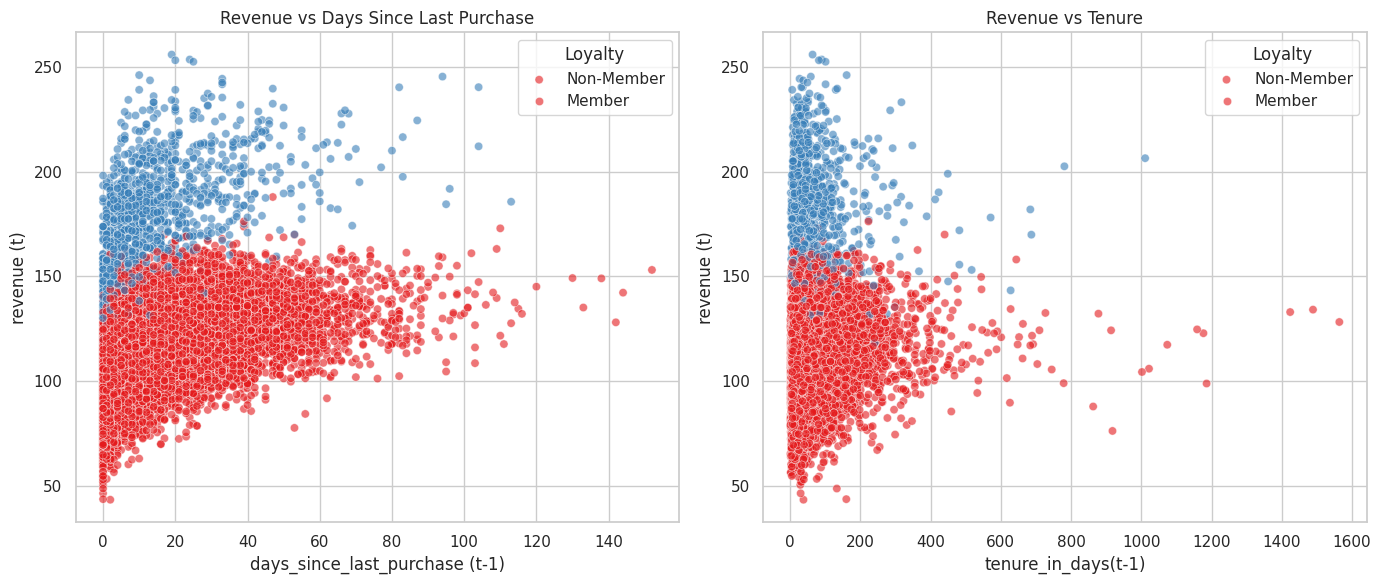

In [ ]:
# =============================================================================
# 7. SCATTER PLOTS - KEY RELATIONSHIPS
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Revenue vs Days Since Last Purchase
sns.scatterplot(x='days_since_last_purchase (t-1)', y='revenue (t)',
                hue='loyalty_membership', data=df, palette='Set1',
                alpha=0.6, ax=axes[0])
axes[0].set_title('Revenue vs Days Since Last Purchase')
axes[0].legend(title='Loyalty', labels=['Non-Member', 'Member'])

# Revenue vs Tenure
sns.scatterplot(x='tenure_in_days(t-1)', y='revenue (t)',
                hue='loyalty_membership', data=df, palette='Set1',
                alpha=0.6, ax=axes[1])
axes[1].set_title('Revenue vs Tenure')
axes[1].legend(title='Loyalty', labels=['Non-Member', 'Member'])

plt.tight_layout()
plt.show()


CUSTOMER SEGMENTATION - RFM ANALYSIS

Customer Segment Distribution:
Lost                : 6,773 ( 33.9%)
Promising           : 2,392 ( 12.0%)
Loyal Customers     : 1,942 (  9.7%)
Potential Loyalists : 1,903 (  9.5%)
New Customers       : 1,727 (  8.6%)
Champions           : 1,686 (  8.4%)
About to Sleep      : 1,252 (  6.3%)
At Risk             : 1,174 (  5.9%)
Need Attention      : 1,151 (  5.8%)


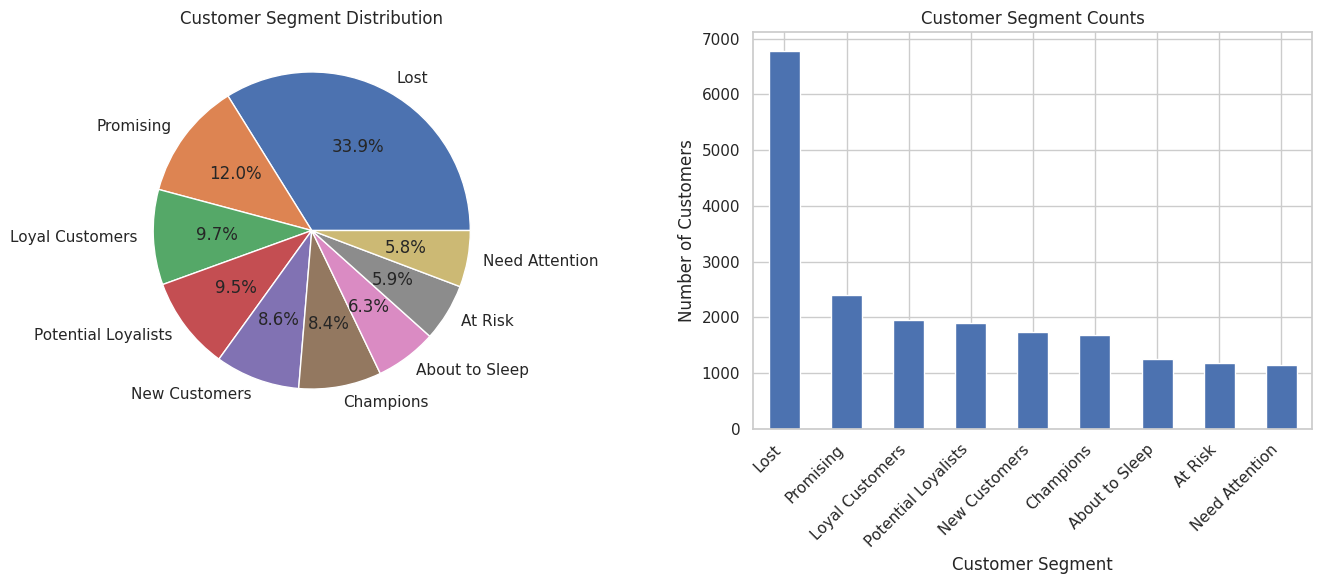


Segment Characteristics:
                     aov (t-1)  days_since_last_purchase (t-1)  \
customer_segment                                                 
About to Sleep          127.41                           35.99   
At Risk                  67.43                           15.00   
Champions               131.66                            2.78   
Lost                    101.80                           11.93   
Loyal Customers          66.94                            5.23   
Need Attention          127.35                           14.82   
New Customers           136.55                           25.81   
Potential Loyalists      67.02                            5.23   
Promising                67.43                           25.60   

                     tenure_in_days(t-1)  revenue (t)  loyalty_membership  
customer_segment                                                           
About to Sleep                     16.01       133.76                0.05  
At Risk            

In [ ]:
# =============================================================================
# 8. CUSTOMER SEGMENTATION (RFM ANALYSIS)
# =============================================================================

print("\n" + "="*60)
print("CUSTOMER SEGMENTATION - RFM ANALYSIS")
print("="*60)

# Create RFM scores
df['recency_score'] = pd.qcut(df['days_since_last_purchase (t-1)'],
                               4, labels=[4,3,2,1])
df['frequency_score'] = pd.qcut(df['tenure_in_days(t-1)'],
                                 4, labels=[1,2,3,4])
df['monetary_score'] = pd.qcut(df['aov (t-1)'], 4, labels=[1,2,3,4])

df['rfm_score'] = (df['recency_score'].astype(str) +
                   df['frequency_score'].astype(str) +
                   df['monetary_score'].astype(str))

# Segment customers
def segment_customers(row):
    score = row['rfm_score']
    if score in ['444', '443', '434', '344', '433']:
        return 'Champions'
    elif score in ['342', '332', '341', '331', '421', '422']:
        return 'Loyal Customers'
    elif score in ['412', '411', '311', '312', '321', '322']:
        return 'Potential Loyalists'
    elif score in ['243', '244', '234', '143', '144', '134']:
        return 'New Customers'
    elif score in ['131', '132', '141', '142', '231', '232', '241', '242']:
        return 'Promising'
    elif score in ['213', '214', '223', '224']:
        return 'Need Attention'
    elif score in ['113', '114', '123', '124']:
        return 'About to Sleep'
    elif score in ['212', '211', '222', '221']:
        return 'At Risk'
    else:
        return 'Lost'

df['customer_segment'] = df.apply(segment_customers, axis=1)

# Segment distribution
segment_counts = df['customer_segment'].value_counts()
print("\nCustomer Segment Distribution:")
for segment, count in segment_counts.items():
    print(f"{segment:20s}: {count:5,} ({count/len(df)*100:5.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
segment_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Customer Segment Distribution')
axes[0].set_ylabel('')

# Bar chart
segment_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Customer Segment Counts')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Customer Segment')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Segment characteristics
print("\nSegment Characteristics:")
segment_profile = df.groupby('customer_segment').agg({
    'aov (t-1)': 'mean',
    'days_since_last_purchase (t-1)': 'mean',
    'tenure_in_days(t-1)': 'mean',
    'revenue (t)': 'mean',
    'loyalty_membership': 'mean'
}).round(2)
print(segment_profile)


CUSTOMER LIFECYCLE ANALYSIS

Lifecycle Distribution:
New Customer        : 10,205 ( 51.0%)
Active              : 8,415 ( 42.1%)
Potentially At Risk : 1,228 (  6.1%)
Loyal               :   112 (  0.6%)
At Risk             :    25 (  0.1%)
Hibernating         :    15 (  0.1%)


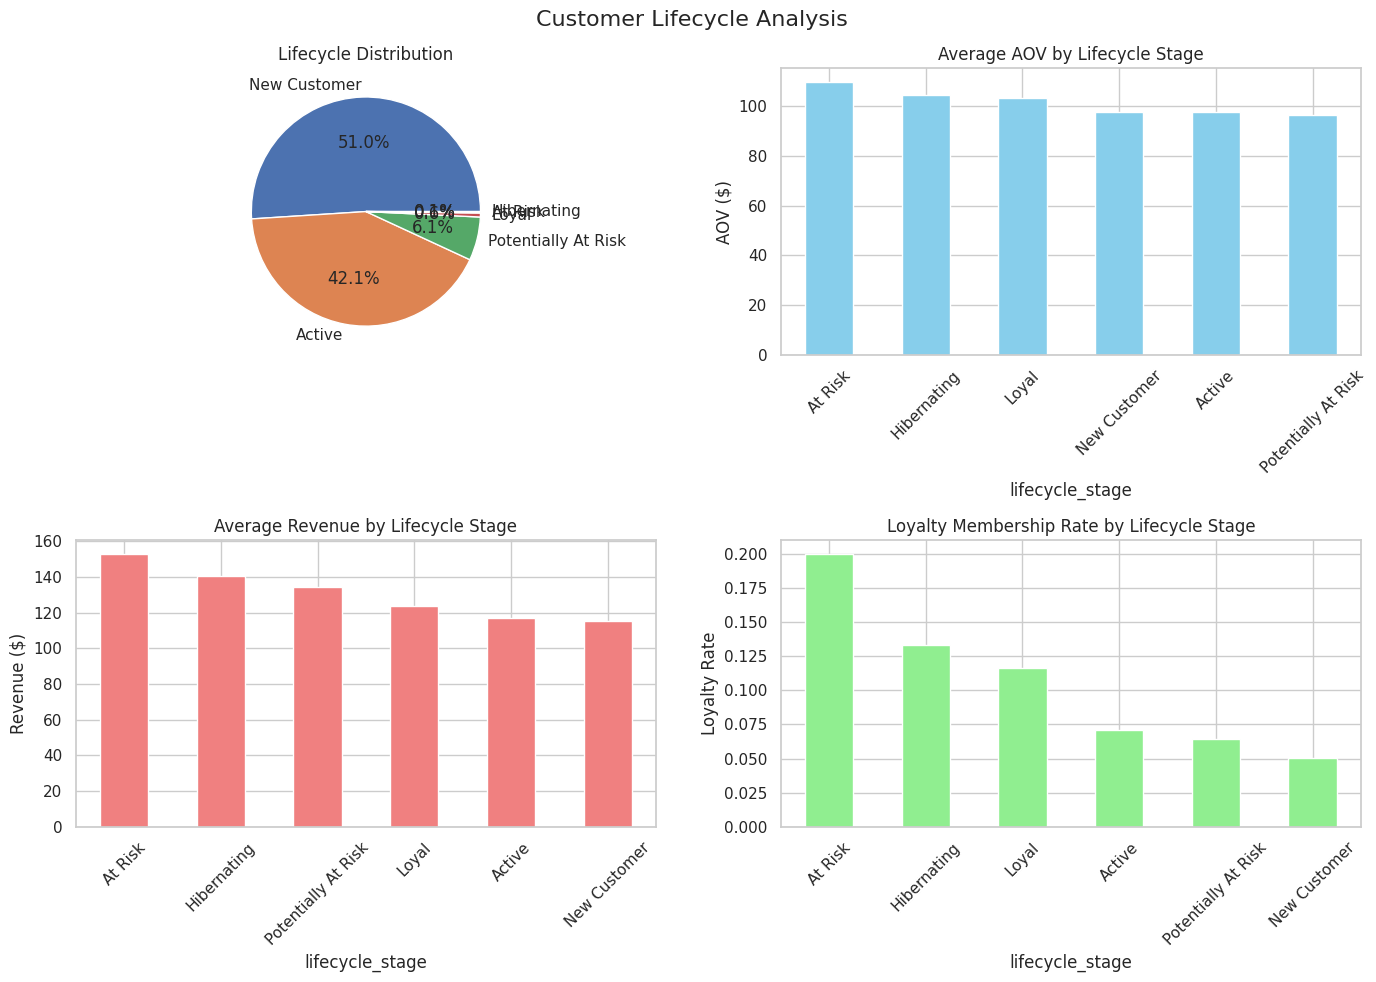

In [ ]:
# =============================================================================
# 9. LIFECYCLE ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("CUSTOMER LIFECYCLE ANALYSIS")
print("="*60)

def categorize_lifecycle(row):
    tenure = row['tenure_in_days(t-1)']
    recency = row['days_since_last_purchase (t-1)']

    if tenure <= 30:
        return 'New Customer'
    elif tenure <= 365:
        if recency <= 30:
            return 'Active'
        elif recency <= 90:
            return 'Potentially At Risk'
        else:
            return 'At Risk'
    else:
        if recency <= 30:
            return 'Loyal'
        elif recency <= 90:
            return 'Hibernating'
        else:
            return 'Lost'

df['lifecycle_stage'] = df.apply(categorize_lifecycle, axis=1)

lifecycle_counts = df['lifecycle_stage'].value_counts()
print("\nLifecycle Distribution:")
for stage, count in lifecycle_counts.items():
    print(f"{stage:20s}: {count:5,} ({count/len(df)*100:5.1f}%)")

# Lifecycle visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Customer Lifecycle Analysis', fontsize=16)

# Distribution
axes[0,0].pie(lifecycle_counts.values, labels=lifecycle_counts.index,
              autopct='%1.1f%%')
axes[0,0].set_title('Lifecycle Distribution')

# AOV by lifecycle
lifecycle_aov = df.groupby('lifecycle_stage')['aov (t-1)'].mean().sort_values(ascending=False)
lifecycle_aov.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Average AOV by Lifecycle Stage')
axes[0,1].set_ylabel('AOV ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# Revenue by lifecycle
lifecycle_revenue = df.groupby('lifecycle_stage')['revenue (t)'].mean().sort_values(ascending=False)
lifecycle_revenue.plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Average Revenue by Lifecycle Stage')
axes[1,0].set_ylabel('Revenue ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Loyalty rate by lifecycle
lifecycle_loyalty = df.groupby('lifecycle_stage')['loyalty_membership'].mean().sort_values(ascending=False)
lifecycle_loyalty.plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Loyalty Membership Rate by Lifecycle Stage')
axes[1,1].set_ylabel('Loyalty Rate')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()